<a href="https://colab.research.google.com/github/LeNovice/Assignments_WILP_SEM3/blob/main/DL_Assignment1_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
#For DNN model
from tensorflow.keras import models
from tensorflow.keras import layers
#For changing shapes of np array tensors
import numpy as np
#For plotting the dataset
import matplotlib.pyplot as plt
#For Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170508288/170498071 [==============================] - 16s 0us/step


###1. Data Visualization and augmentation (1 mark)

*   Plot at least two samples from each class of the dataset (use matplotlib/seaborn/any other library).

In [3]:
#Get the class IDs of each data element in a set
classes_ID = np.unique(y_train)
display(classes_ID)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
data_class_acc_class = []
for class_id in classes_ID:
    data_class_acc_class.append([i for i,x in enumerate(y_train) if x == class_id])



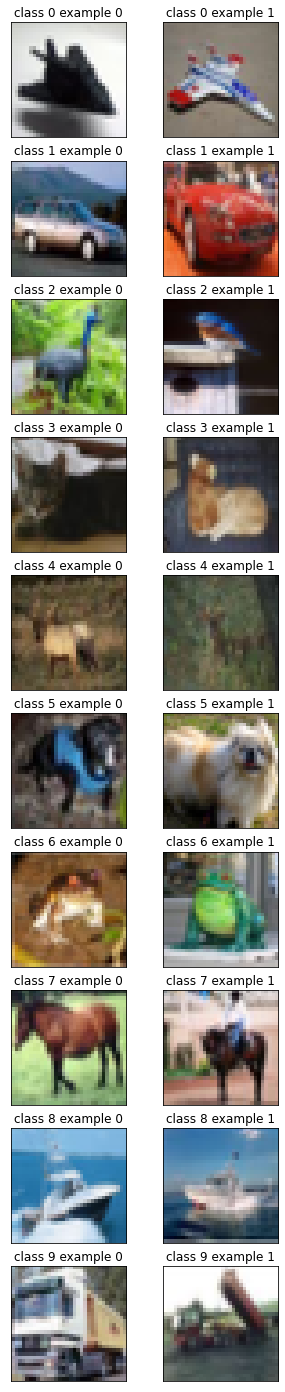

In [5]:
rows = len(classes_ID)
#display(rows)
columns = 2         #Since 2 of each is asked
#fig, ax = plt.subplot(nrows=rows, ncols=columns)
fig = plt.figure(figsize=(5,25))
i_ax=0
for class_id in classes_ID:
    fig.add_subplot(rows, columns, i_ax+1)
    plt.imshow(x_train[data_class_acc_class[class_id][0]])
    plt.xticks([])      #Does not clutter the axes
    plt.yticks([])
    plt.title("class " + str(class_id) + " example 0")
    #ax[i_ax].plot(x_train[data_class_acc_class[class_id][0]])
    i_ax = i_ax+1
    fig.add_subplot(rows, columns, i_ax+1)
    plt.imshow(x_train[data_class_acc_class[class_id][1]])
    plt.title("class " + str(class_id) + " example 1")
    plt.xticks([])  
    plt.yticks([])
    #ax[i_ax].plot(x_train[data_class_acc_class[class_id][1]])
    i_ax = i_ax+1
plt.show()

*   Apply rotation and height shift augmentation (rotation_range, height_shift_range)to the dataset separately. Print the augmented image and the original image for each class and each augmentation.



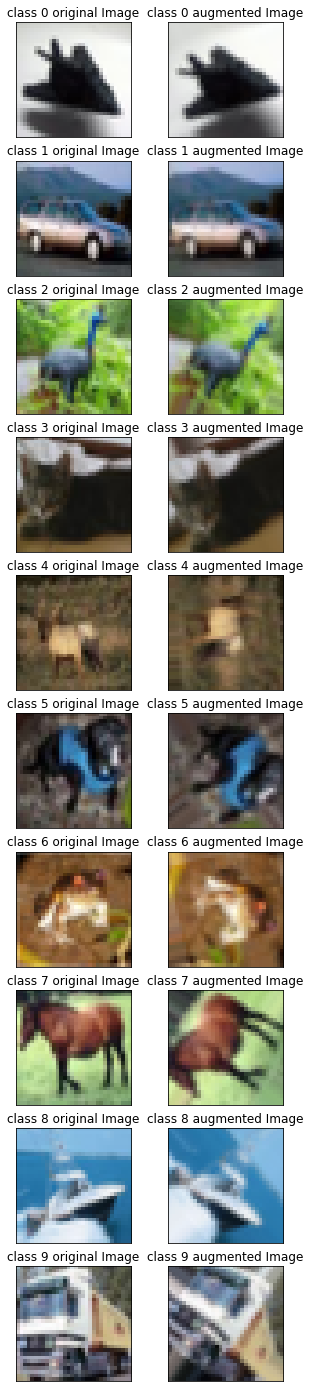

In [6]:

#First applying random rotation to the dataset:
#define Data preparation
datagen = ImageDataGenerator(rotation_range=90)
"""
#Fit parameters from data
#Note that the ImageDataGenerator is conservative about memory. It will only generate the images that you wish to use. Not convert the entire dataset immediately and store it.
#Thus, the below function will only calculate the statistics required to actually perform the transforms to your image data.
"""
datagen.fit(x_train)
"""
#We can also configure the batch size and other parameters for the data generator using flow API. flow generates batches of the augmented data
#Here, x_train needs to be of the form (batches, image_width, image_height, channels). In this case, ([50000/9], 32, 32, 3)
When we need to train a DNN model for augmented dataset, we will use the fit_generator method
"""
#data_flow = datagen.flow(x_train, y_train, batch_size=9)
"""
#The output of above is 50000/9 sets with each set containing 9 AUGMENTED x_train images and corresponding labels. The 9 selected data elements are selected randomly, it seems.
#Running on the entire dataset as single batch
"""
#data_flow = datagen.flow(x_train, y_train)


#display(data_flow[0])

"""We will go for single image augmentation to maintain one to one display"""
fig = plt.figure(figsize=(5,25))
i_ax=0
for class_id in classes_ID:
    original_image = x_train[data_class_acc_class[class_id][0]]
    #original_image = original_image.astype('float32')
    fig.add_subplot(rows, columns, i_ax+1)
    plt.imshow(original_image)
    plt.xticks([])      #Does not clutter the axes
    plt.yticks([])
    plt.title("class " + str(class_id) + " original Image")
    i_ax = i_ax + 1
    #input image to flow API should have (samples, width, height, channels) structure
    #original_image is an ndarray. We need to add the sample dimension to it
    
    original_image_input = original_image.reshape((1, *original_image.shape))       #x_train.shape(1), x_train.shape(2), x_train.shape(3)))
    augmented_image = datagen.flow(original_image_input)
    fig.add_subplot(rows, columns, i_ax+1)
    #augmented_image[0] will have the x_train image. This will be in float (after Affine Warp calculations) and in range [0,1]. We need to bring it back to [0,255] (by multiplying it by 255)
    np.multiply(augmented_image[0],255)
    augmented_image_disp = augmented_image[0].astype(int)
    plt.imshow(augmented_image_disp.reshape(original_image.shape))
    plt.xticks([])      #Does not clutter the axes
    plt.yticks([])
    plt.title("class " + str(class_id) + " augmented Image")
    i_ax = i_ax + 1
plt.show()

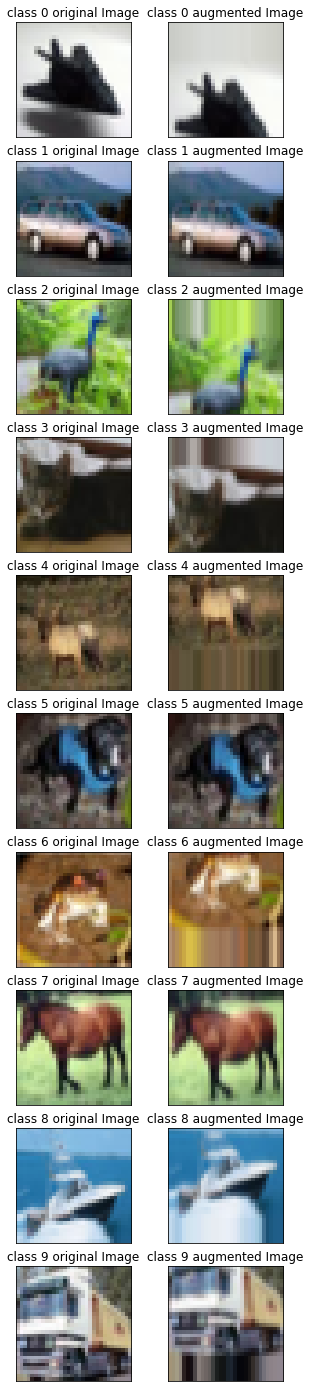

In [7]:
datagen = ImageDataGenerator(height_shift_range=10.5)
datagen.fit(x_train)

fig = plt.figure(figsize=(5,25))
i_ax=0
for class_id in classes_ID:
    original_image = x_train[data_class_acc_class[class_id][0]]
    #original_image = original_image.astype('float32')
    fig.add_subplot(rows, columns, i_ax+1)
    plt.imshow(original_image)
    plt.xticks([])      #Does not clutter the axes
    plt.yticks([])
    plt.title("class " + str(class_id) + " original Image")
    i_ax = i_ax + 1
    #input image to flow API should have (samples, width, height, channels) structure
    #original_image is an ndarray. We need to add the sample dimension to it
    
    original_image_input = original_image.reshape((1, *original_image.shape))       #x_train.shape(1), x_train.shape(2), x_train.shape(3)))
    augmented_image = datagen.flow(original_image_input)
    fig.add_subplot(rows, columns, i_ax+1)
    #augmented_image[0] will have the x_train image. This will be in float (after Affine Warp calculations) and in range [0,1]. We need to bring it back to [0,255] (by multiplying it by 255)
    np.multiply(augmented_image[0],255)
    augmented_image_disp = augmented_image[0].astype(int)
    plt.imshow(augmented_image_disp.reshape(original_image.shape))
    plt.xticks([])      #Does not clutter the axes
    plt.yticks([])
    plt.title("class " + str(class_id) + " augmented Image")
    i_ax = i_ax + 1
plt.show()

*   Bring the train and test data in the required format.

In [8]:
#Flatten the input images as input to the DNN model is 1D array of the image pixels.
x_train = x_train.reshape((50000, 32*32*3))
x_test = x_test.reshape((10000, 32*32*3))
#If necessary, bring the data into float32 type:
x_train = x_train.astype('float32')/255     #We convert each pixel from 0-255 int to 0-1 float
x_test = x_test.astype('float32')/255       #We convert each pixel from 0-255 int to 0-1 float

#Create one-hot encoding for output labels
#This is done because the output of the layers will NOT be integer. Rather it will be 10 nodes each representing a class of CIFAR10 dataset.
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


*   Print the shapes of train and test data.

In [9]:
display("Shape of training images")
display(x_train.shape)
display("Shape of test images")
display(x_test.shape)
display("Shape of training labels")
display(y_train.shape)
display("Shape of test images")
display(y_test.shape)

'Shape of training images'

(50000, 3072)

'Shape of test images'

(10000, 3072)

'Shape of training labels'

(50000, 10)

'Shape of test images'

(10000, 10)

### 2.  Model Building 
* Sequential Model layers- Use AT LEAST 3 hidden layers with appropriate input for each. Choose the best number for hidden units and give reasons.
* Add L2 regularization to all the layers.
* Add one layer of dropout at the appropriate position and give reasons.
* Choose the appropriate activation function for all the layers.
* Print the model summary.

In [10]:
#Creating a sequential model
dnnModel = models.Sequential()

In [31]:
#HyperParameterList
InputLayer_nodes = 1536     #50
HiddenLayer1_nodes = 768    #90
HiddenLayer2_nodes = 384    #60
HiddenLayer3_nodes = 128    #30
OutputLayer_nodes = 10                      #This will not change because the output is a one hot vector of 10 elements
Regularization_constant_lambda = 0.01       #Putting this to 0 will remove L2 regularization?


#Adding the layers to the sequential DNN Model

#Layer 1 = Input Layer
#We are applying regularization to layer's kernel (Dense) and layer's output only. Not applying to bias
dnnModel.add(layers.Dense(InputLayer_nodes, activation='relu', input_shape= (32*32*3,), kernel_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda), activity_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda)))

#Layer2 = Hidden Layer 1
dnnModel.add(layers.Dense(HiddenLayer1_nodes, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda), activity_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda)))
#We select Layer2 or Hidden Layer1 for dropout of 50%
"""Dropouts act like bagging algorithms wehre we drop few features/ data instances and traing different models based on the dropped instances.
We select this layer as it has the maximum number of nodes. Dropping upto 50% should not affect the overall DNN Model severely"""
dnnModel.add(layers.Dropout(0.5))

#Layer3 = Hidden Layer 2
dnnModel.add(layers.Dense(HiddenLayer2_nodes, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda), activity_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda)))

#Layer4 = Hidden Layer 3
dnnModel.add(layers.Dense(HiddenLayer3_nodes, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda), activity_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda)))

#Layer5 = Output Layer
dnnModel.add(layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda), activity_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda)))

dnnModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                153650    
                                                                 
 dense_1 (Dense)             (None, 90)                4590      
                                                                 
 dropout (Dropout)           (None, 90)                0         
                                                                 
 dense_2 (Dense)             (None, 60)                5460      
                                                                 
 dense_3 (Dense)             (None, 30)                1830      
                                                                 
 dense_4 (Dense)             (None, 10)                310       
                                                                 
 dense_5 (Dense)             (None, 1536)              1

### 3. Model Compilation (0.25 mark)
* Compile the model with the appropriate loss function.
* Use an appropriate optimizer. Give reasons for the choice of learning rate and its value.
* Use accuracy as a metric.

Selection of Learning rate:
Ideally Learning rate should be smaller than twice the minimum optimal learning rate where minimal optimal learning rate is given by:

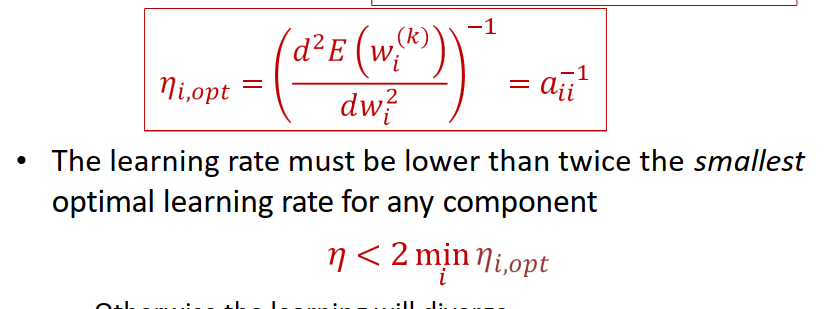

In CIFAR10 dataset case, the error function will be the categorical cross entropy (multi-class classification problem)

However, it is easier to get better learning rate by using trial and error.
We select the learning rate for which the accuracy for training data as well as test data matches and is high.

In [32]:
#Loss will be Cross-entropy since this is a multi-label classification problem
#We check whether global minimum is possible using the ADAM optimizer but SGD optimizer should also work. We will test Both
#Hyperparameters
Learning_Rate = 1e-1

opt = tf.keras.optimizers.Adam(learning_rate=Learning_Rate)         #OR tf.keras.optimizers.SGD(learning_rate=Learning_Rate, momentum=0.0)

dnnModel.compile( optimizer = opt, loss = 'categorical_crossentropy', metrics=['accuracy'] )

### 4. Model Training (0.5 + 0.25 = 0.75 mark)
* Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size.
* Plot the loss and accuracy history graphs for both train and validation set. Print the total time taken for training.

In [33]:
#Precursor to measure training time
from timeit import default_timer as timer

class TimingCallback(tf.keras.callbacks.Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_train_begin(self, epoch, logs={}):
        """We over-ride callback methods declared here: https://keras.io/guides/writing_your_own_callbacks/"""
        self.starttime = timer()
    def on_train_end(self, epoch, logs={}):
        self.totaltime = timer()-self.starttime

timingCB = TimingCallback()

In [34]:
h = dnnModel.fit( x_train, y_train, validation_split=0.2, epochs=25, batch_size=64, callbacks=[timingCB])

Epoch 1/25
625/625 [==============================] - 5s 6ms/step - loss: 3.2629 - accuracy: 0.0982 - val_loss: 2.3104 - val_accuracy: 0.1025
Epoch 2/25
625/625 [==============================] - 3s 6ms/step - loss: 2.3166 - accuracy: 0.0990 - val_loss: 2.3346 - val_accuracy: 0.1014
Epoch 3/25
625/625 [==============================] - 3s 6ms/step - loss: 2.4728 - accuracy: 0.0979 - val_loss: 2.4471 - val_accuracy: 0.0980
Epoch 4/25
625/625 [==============================] - 3s 6ms/step - loss: 2.4253 - accuracy: 0.1008 - val_loss: 2.4051 - val_accuracy: 0.0980
Epoch 5/25
625/625 [==============================] - 3s 6ms/step - loss: 2.4363 - accuracy: 0.1001 - val_loss: 2.4200 - val_accuracy: 0.1014
Epoch 6/25
625/625 [==============================] - 3s 5ms/step - loss: 2.4152 - accuracy: 0.1005 - val_loss: 2.4704 - val_accuracy: 0.1014
Epoch 7/25
625/625 [==============================] - 3s 5ms/step - loss: 2.4235 - accuracy: 0.0992 - val_loss: 2.4409 - val_accuracy: 0.0952
Epoch 

In [35]:
print('Final training loss \t', h.history['loss'][-1])
print('Final training accuracy ', h.history['accuracy'][-1])
print("Total training time = " + str(timingCB.totaltime))

Final training loss 	 2.4197731018066406
Final training accuracy  0.10042499750852585
Total training time = 88.7041157220001


### 5. Model Training (0.5 + 0.25 = 0.75 mark)
* Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size.
* Plot the loss and accuracy history graphs for both train and validation set. Print the total time taken for training.

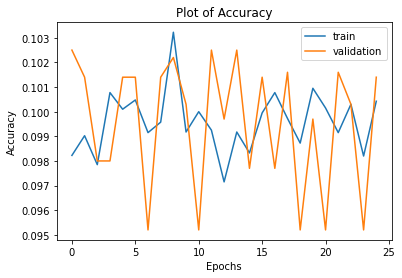

In [36]:
# plot the training  accuracy  

plt.plot(h.history['accuracy'], label='train')
plt.plot(h.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Plot of Accuracy')
plt.legend()
plt.show()

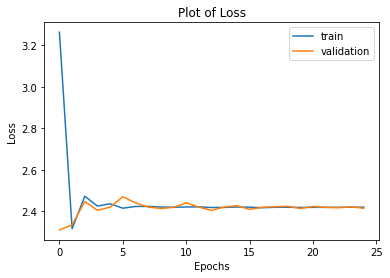

In [37]:
# plot the traininig loss 

plt.plot(h.history['loss'], label='train')
plt.plot(h.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Loss')
plt.legend()
plt.show()

### 6. Model Evaluation (0.5 + 0.5 = 1 mark)
* Print the final train and validation loss and accuracy. Print confusion matrix and classification report for the validation dataset. Analyse and report the best and worst performing class.
* Print the two most incorrectly classified images for each class in the test dataset.

In [38]:
testLoss, testAccuracy = dnnModel.evaluate( x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 2.4155 - accuracy: 0.1000


In [39]:
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

Testing loss 	 2.4154956340789795
Testing accuracy  0.10000000149011612
